In [13]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lmfit

def decaying_cosine(t, A0, tau, omega, phi):
    return A0*np.exp(-t/tau)*np.cos(omega*t+phi)

def ddt_decaying_cosine(t, A0, tau, omega, phi):
    return -A0*np.exp(-t/tau)*(np.cos(omega*t+phi)/tau+omega*np.sin(omega*t+phi))

\\LINNA\Users\Magpie\Documents\MAGPIE data\2016\Dec_2016\s1208_16 Exploding Liner\s1205_16 Bdot calibration\with generator x10p8 atten CH1 = yellow


In [184]:
def decaying_cosine(t, A0, tau, omega, phi):
    return A0*np.exp(-t/tau)*np.cos(omega*t+phi)

def ddt_decaying_cosine(t, A0, tau, omega, phi):
    return -A0*np.exp(-t/tau)*(np.cos(omega*t+phi)/tau+omega*np.sin(omega*t+phi))

class Tektronix:
    def __init__(self, filename, start=300, end=-1):
        self.data=np.genfromtxt(filename, usecols=[3,4], delimiter=',')
        self.t=self.data[start:end,0]
        self.V=self.data[start:end,1]
    def report(self):
        print(self.res.fit_report())
    def normalised_waveform(self):
        self.nwf=decaying_cosine(self.t, 1, self.res.best_values['tau'], self.res.best_values['omega'], self.res.best_values['phi'])
        
class Current(Tektronix):
    def fit_data(self):
        mod=lmfit.Model(decaying_cosine, independent_vars=['t'])
        mod.set_param_hint('tau', value = 6e-6, min=0)
        mod.set_param_hint('A0', value = 4,min=0)
        mod.set_param_hint('omega', value = 3e6, min=0)
        mod.set_param_hint('phi', value = 0)
    
        self.res=mod.fit(self.V, t=self.t)
    def find_I0(self, C_P=10, A_tP=1.0):
        self.I0=self.res.best_values['A0']*C_P*A_tP
        
class Bdot(Tektronix):
    def fit_data(self):
        mod=lmfit.Model(ddt_decaying_cosine, independent_vars=['t'])
        mod.set_param_hint('tau', value = 6e-6, min=0)
        mod.set_param_hint('A0', value = 4e-7, min=0)
        mod.set_param_hint('omega', value = 3e6, min=0)
        mod.set_param_hint('phi', value = 0)
    
        self.res=mod.fit(self.V, t=self.t)
    def find_A_eff(self, I0=920, BS=3700, A_t=1):
            self.A_eff=self.res.best_values['A0']*A_t*1e7/(I0*BS)
            self.dBdt=self.V/self.A_eff
            
def calibration_report(I, BD1, BD2):
    fig,axes=plt.subplots(1,3,figsize=(10,3))

    ax=axes[0]
    ax.plot(BD1.t*1e6, BD1.V, label='B-dot 1')
    ax.plot(BD2.t*1e6, BD2.V, label='B-dot 2')
    ax.set_ylabel(r'Voltage (V)')
    ax.set_xlabel(r'Time ($\mu$s)')
    ax.set_xlim([0,20])
    ax.legend(fontsize=10)

    ax=axes[1]
    ax.plot(BD1.t*1e6, BD1.dBdt/1e6, label='B-dot 1')
    ax.plot(BD2.t*1e6, BD2.dBdt/1e6, label='B-dot 2')
    ax.set_ylabel(r'V/A$_{eff}$ (T/$\mu$s)')
    ax.set_xlabel(r'Time ($\mu$s)')
    ax.set_xlim([0,20])
    ax.legend(fontsize=10)

    ax=axes[2]
    ax.plot(BD1.t*1e6, (BD1.dBdt-BD2.dBdt)/1e6, label='Difference', c='black')
    ax.plot(BD2.t*1e6, (BD1.dBdt+BD2.dBdt)/1e6, label='Sum',c='red')
    ax.set_xlim([0,20])
    ax.set_ylabel(r'dB/dT (T/$\mu$s)')
    ax.set_xlabel(r'Time ($\mu$s)')
    ax.legend(fontsize=10)


    plt.tight_layout()


In [190]:
%cd "\\LINNA\Users\Magpie\Documents\MAGPIE data\2016\Dec_2016\s1208_16 Exploding Liner\s1205_16 Bdot calibration\with generator x10p8 atten CH1 = yellow"
end=-1

I=Current(filename='F0015CH3.CSV',end=end)
I.fit_data()
I.find_I0(A_tP=10.8)

\\LINNA\Users\Magpie\Documents\MAGPIE data\2016\Dec_2016\s1208_16 Exploding Liner\s1205_16 Bdot calibration\with generator x10p8 atten CH1 = yellow


In [191]:
BD1=Bdot('F0015CH1.CSV',end=end)
BD1.fit_data()
BD1.find_A_eff(I0=I.I0)

In [192]:
BD2=Bdot('F0015CH2.CSV',end=end)
BD2.fit_data()
BD2.find_A_eff(I0=I.I0)

<IPython.core.display.Javascript object>


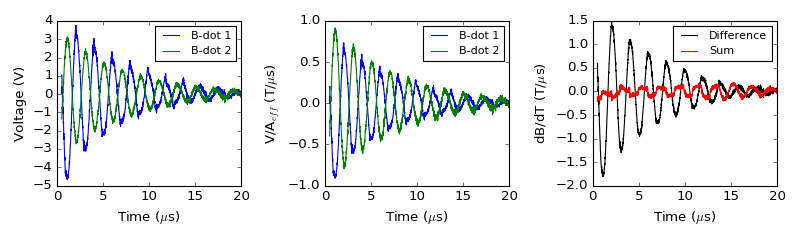

In [193]:
fig,axes=plt.subplots(1,3,figsize=(10,3))

ax=axes[0]
ax.plot(BD1.t*1e6, BD1.V, label='B-dot 1')
ax.plot(BD2.t*1e6, BD2.V, label='B-dot 2')
ax.set_ylabel(r'Voltage (V)')
ax.set_xlabel(r'Time ($\mu$s)')
ax.set_xlim([0,20])
ax.legend(fontsize=10)

ax=axes[1]
ax.plot(BD1.t*1e6, BD1.dBdt/1e6, label='B-dot 1')
ax.plot(BD2.t*1e6, BD2.dBdt/1e6, label='B-dot 2')
ax.set_ylabel(r'V/A$_{eff}$ (T/$\mu$s)')
ax.set_xlabel(r'Time ($\mu$s)')
ax.set_xlim([0,20])
ax.legend(fontsize=10)

ax=axes[2]
ax.plot(BD1.t*1e6, (BD1.dBdt-BD2.dBdt)/1e6, label='Difference', c='black')
ax.plot(BD2.t*1e6, (BD1.dBdt+BD2.dBdt)/1e6, label='Sum',c='red')
ax.set_xlim([0,20])
ax.set_ylabel(r'dB/dT (T/$\mu$s)')
ax.set_xlabel(r'Time ($\mu$s)')
ax.legend(fontsize=10)


plt.tight_layout()

In [147]:
%cd C:\Users\jdhare\Google Drive\MAGPIE\data\Others
fig.savefig('s1208_16 Bdot calibration.png')

C:\Users\jdhare\Google Drive\MAGPIE\data\Others


In [205]:
for A in [I, BD1, BD2]:
    print(A.report())

[[Model]]
    Model(decaying_cosine)
[[Fit Statistics]]
    # function evals   = 65
    # data points      = 2199
    # variables        = 4
    chi-square         = 56.100
    reduced chi-square = 0.026
    Akaike info crit   = -8059.309
    Bayesian info crit = -8036.526
[[Variables]]
    A0:      8.35713495 +/- 0.019932 (0.24%) (init= 4)
    tau:     6.8311e-06 +/- 2.20e-08 (0.32%) (init= 6e-06)
    omega:   3.1520e+06 +/- 484.2756 (0.02%) (init= 3000000)
    phi:     1.38342242 +/- 0.002494 (0.18%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(omega, phi)                = -0.769 
    C(A0, tau)                   = -0.756 

None
[[Model]]
    Model(ddt_decaying_cosine)
[[Fit Statistics]]
    # function evals   = 50
    # data points      = 2199
    # variables        = 4
    chi-square         = 128.736
    reduced chi-square = 0.059
    Akaike info crit   = -6232.751
    Bayesian info crit = -6209.968
[[Variables]]
    A0:      1.7084e-06 +/- 1.12e-08 (0.6

In [237]:
from scipy.integrate import cumtrapz
dBdt=(BD1.dBdt-BD2.dBdt)/2
B=cumtrapz(dBdt,BD1.t,)

In [244]:
def norm(array):
    return array/abs(array).max()

<IPython.core.display.Javascript object>


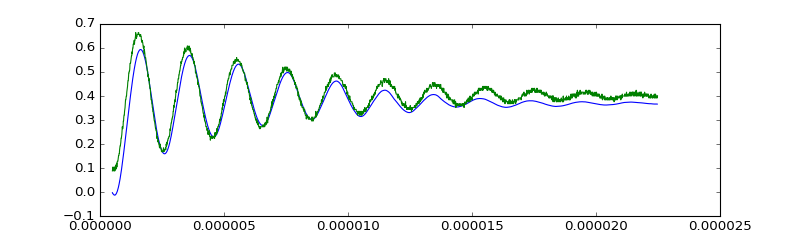

In [254]:
fig,ax=plt.subplots(1,figsize=(10,3))
ax.plot(BD1.t[:-1], -B)
ax.plot(I.t, I.V/25+0.4)

<IPython.core.display.Javascript object>


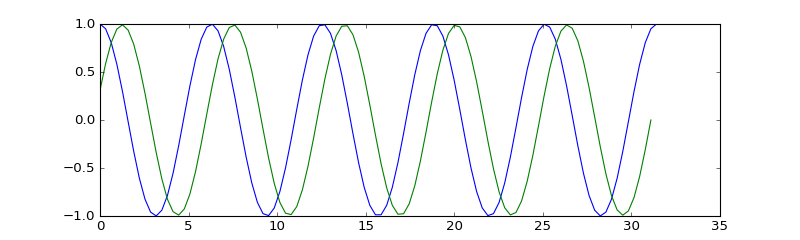

In [235]:
t=np.linspace(0,10*np.pi,100)
dydt=np.cos(t)
y=cumtrapz(dydt,x=t)
fig,ax=plt.subplots(1,figsize=(10,3))
ax.plot(t, dydt)
ax.plot(t[:-1], y)

In [222]:
BD1.t[:-1]

array([  5.00000000e-07,   5.10000000e-07,   5.20000000e-07, ...,
         2.24500000e-05,   2.24600000e-05,   2.24700000e-05])